# Q2. Traffic Sign Detection with YOLOv8
## Tóm tắt vấn đề: Nhận diện biển báo giao thông bằng YOLOv8
Cho tập data Nhận diện vật thể các biển báo giao thông trên Kaggle:
https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-dataset-in-yolo-format.

### Học viên thực hiện các yêu cầu sau:
#### 1. Format tập data trên cho phù hợp với cấu trúc và định dạng format của mô hình YOLOv8. Tiến hành chia tập train ban đầu thành 3 tập train official validation và test (Học viên có thể tự chọn tỉ lệ phù hợp, ví dụ: 60%:20%:20% cho train:val:test)
#### 2. Tiến hành xây dưng mô hình YOLOv8 và huấn luyện mô hình trên tập train, tuning trên tập validation.
#### 3. Visualize dự đoán kèm bounding box của mô hình thu được từ bước (3) trên 8 mẫu trong tập test.
#### 4. Dự đoán trên tập test, in performance của model (mAP @ 50) trên các nhãn. Nhận xét.


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


## 1. Format tập data trên cho phù hợp với cấu trúc và định dạng format của mô hình YOLOv8

## Download the data

In [ ]:
## get dataset from kaggle: https://www.kaggle.com/datasets/valentynsichkar/traffic-signs-dataset-in-yolo-format
## i downloaded and made a copy from my drive
""" This is a Traffic Sign dataset, we have 4 label 0, 1, 2 and 3
"""
!mkdir -p /content/dataset
!cp /gdrive/MyDrive/ComputerVision/Yolo/archive.zip /content/dataset/
%cd /content/dataset/
!unzip -qq archive.zip

/content/dataset


In [ ]:
!mv /content/dataset/ts/ts /content/dataset/images

Yolo structure:
- dataset
 |-- images
 |   |-- train
 |   |-- valid
 |   |-- test
 |-- labels
     |-- train
     |-- valid
     |-- test

##  Fitting Yolo v8 format

In [ ]:
# the dataset put labels and images in the same folder, so we moving it out
%cd /content/dataset
!mkdir -p labels/{train,valid,test}

/content/dataset


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
image_folder = "/content/dataset/images"
train_folder = "/content/dataset/images/train"
valid_folder = "/content/dataset/images/valid"
os.makedirs(train_folder, exist_ok=True)
os.makedirs(valid_folder, exist_ok=True)
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

## Tiến hành chia tập train ban đầu thành 2 tập train official và validation.

In [ ]:
# Chia tập hình ảnh thành train và test
train_images, valid_images = train_test_split(image_files, test_size=0.2, random_state=42)

In [ ]:
def move_files(source_folder, destination_folder, file_list):
    for file_name in file_list:
        source_path = os.path.join(source_folder, file_name)
        destination_path = os.path.join(destination_folder, file_name)
        shutil.move(source_path, destination_path)

In [ ]:
move_files(image_folder, train_folder, train_images)
move_files(image_folder, valid_folder, valid_images)

In [ ]:
label_folder = "/content/dataset/labels"

In [ ]:
# Đường dẫn đến thư mục chứa tập train và test cho file label
train_label_folder = "/content/dataset/labels/train"
valid_label_folder = "/content/dataset/labels/valid"

# Di chuyển file label vào các thư mục train và test tương ứng
move_files("/content/dataset/images", train_label_folder, [f.replace('.jpg', '.txt') for f in train_images])
move_files("/content/dataset/images", valid_label_folder, [f.replace('.jpg', '.txt') for f in valid_images])

## 2. Tiến hành xây dưng mô hình YOLOv8 và huấn luyện

## Install YOLO v8 package

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.1/701.1 kB 7.5 MB/s eta 0:00:00


##  Configure for training

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO("yolov8m.pt")  # load a pretrained model (recommended for training)

100%|██████████| 49.7M/49.7M [00:00<00:00, 128MB/s]


In [ ]:
config_content = """path: /content/dataset  # dataset root dir
train: images/train  # train images (relative to 'path')
val: images/valid  # val images (relative to 'path')
test:  # test images (optional)

# Classes
names:
  0: prohibitory
  1: danger
  2: mandatory
  3: other
"""
with open("/content/data_traffic_sign_config.yaml", "w") as fw:
  fw.write(config_content)


## Training YOLO v8

In [ ]:
# we have 4 classes 0, 1, 2 and 3, if we put "single_cls"=True meaning we treat all classes as one
model.train(data="/content/data_traffic_sign_config.yaml", epochs=30)  # train the model

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data_traffic_sign_config.yaml, epochs=30, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 31.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 107MB/s]


WARNING ⚠️ NMS time limit 0.550s exceeded
AMP: checks passed ✅


train: Scanning /content/dataset/labels/train... 592 images, 0 backgrounds, 0 corrupt: 100%|██████████| 592/592 [00:00<00:00, 1250.03it/s]


train: New cache created: /content/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/labels/valid... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<00:00, 788.86it/s]

val: WARNING ⚠️ /content/dataset/images/valid/00340.jpg: 1 duplicate labels removed


val: New cache created: /content/dataset/labels/valid.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       6.8G      1.043      5.029     0.8902         40        640: 100%|██████████| 37/37 [00:26<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        149        244      0.102       0.58      0.113     0.0796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         7G     0.9684     0.9834     0.8618         36        640: 100%|██████████| 37/37 [00:23<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        149        244      0.684      0.811      0.693      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      7.05G     0.8914     0.7753      0.835         45        640: 100%|██████████| 37/37 [00:23<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.02it/s]

                   all        149        244      0.665      0.658      0.563      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         7G     0.8903     0.7054       0.85         52        640: 100%|██████████| 37/37 [00:22<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.98it/s]

                   all        149        244      0.915      0.883       0.94      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      7.03G     0.8907     0.6175      0.842         60        640: 100%|██████████| 37/37 [00:22<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        149        244      0.942      0.868      0.927      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      7.04G      0.834     0.6079     0.8378         38        640: 100%|██████████| 37/37 [00:21<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        149        244      0.956      0.883      0.948       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      7.03G      0.911     0.6137     0.8367         53        640: 100%|██████████| 37/37 [00:22<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.28it/s]

                   all        149        244      0.951      0.876      0.934      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         7G     0.8072     0.5459     0.8287         42        640: 100%|██████████| 37/37 [00:23<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.97it/s]

                   all        149        244      0.989      0.879      0.955      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      7.03G     0.7676     0.5132     0.8168         40        640: 100%|██████████| 37/37 [00:30<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.62it/s]

                   all        149        244      0.962      0.873      0.942      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      7.03G     0.7817     0.5076     0.8245         45        640: 100%|██████████| 37/37 [00:22<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        149        244       0.94      0.918       0.96      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      7.03G     0.8073     0.5378      0.829         38        640: 100%|██████████| 37/37 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.17it/s]

                   all        149        244      0.945      0.924      0.962      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      7.01G     0.7425     0.4753     0.8232         28        640: 100%|██████████| 37/37 [00:23<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        149        244      0.963      0.918      0.962      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      7.02G      0.733     0.4609     0.8107         52        640: 100%|██████████| 37/37 [00:23<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.57it/s]

                   all        149        244      0.947      0.909      0.956      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      7.05G     0.7259     0.4518     0.8227         64        640: 100%|██████████| 37/37 [00:21<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.13it/s]

                   all        149        244       0.98      0.895      0.956      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      7.03G     0.7164     0.4469     0.7998         56        640: 100%|██████████| 37/37 [00:22<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]

                   all        149        244      0.944      0.916      0.952      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      7.01G     0.7088     0.4471     0.8094         49        640: 100%|██████████| 37/37 [00:23<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        149        244      0.951      0.905      0.964      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      7.01G     0.7167     0.4541     0.8114         57        640: 100%|██████████| 37/37 [00:21<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.88it/s]

                   all        149        244      0.951      0.935       0.96      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      7.02G     0.6824     0.4314     0.8003         42        640: 100%|██████████| 37/37 [00:22<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.08it/s]

                   all        149        244       0.95      0.933      0.961      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      7.03G      0.661     0.4205     0.8059         33        640: 100%|██████████| 37/37 [00:22<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.73it/s]

                   all        149        244       0.97      0.935      0.967      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      6.99G     0.6664     0.4095     0.8031         43        640: 100%|██████████| 37/37 [00:21<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.61it/s]

                   all        149        244      0.983       0.92      0.964      0.758


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      7.02G     0.7079      0.413      0.816         29        640: 100%|██████████| 37/37 [00:24<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        149        244      0.986      0.926      0.972      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      7.03G     0.6168     0.3731     0.8026         20        640: 100%|██████████| 37/37 [00:20<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.78it/s]

                   all        149        244      0.986      0.916      0.976      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      7.04G     0.6396      0.377     0.8027         23        640: 100%|██████████| 37/37 [00:21<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.39it/s]

                   all        149        244       0.96      0.947      0.983      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      6.98G     0.6261     0.3745     0.7994         20        640: 100%|██████████| 37/37 [00:22<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]

                   all        149        244      0.978      0.945      0.983      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      7.03G     0.5943      0.365     0.7945         32        640: 100%|██████████| 37/37 [00:21<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]

                   all        149        244      0.971      0.945      0.981      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      7.03G     0.5881      0.355     0.7906         25        640: 100%|██████████| 37/37 [00:21<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.63it/s]

                   all        149        244      0.987      0.932      0.984      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      7.03G     0.5677     0.3526     0.7915         24        640: 100%|██████████| 37/37 [00:21<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.18it/s]

                   all        149        244      0.967      0.952      0.982      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         7G     0.5719     0.3431     0.7899         31        640: 100%|██████████| 37/37 [00:23<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.20it/s]

                   all        149        244      0.972      0.943      0.979      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      7.02G     0.5366     0.3262     0.7983         20        640: 100%|██████████| 37/37 [00:21<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.48it/s]

                   all        149        244       0.99      0.954      0.981      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      7.04G     0.5329     0.3149     0.7818         25        640: 100%|██████████| 37/37 [00:21<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.96it/s]

                   all        149        244      0.985      0.957       0.98      0.829



30 epochs completed in 0.249 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.13it/s]


                   all        149        244      0.986      0.957       0.98      0.827
           prohibitory        149        108          1      0.998      0.995      0.867
                danger        149         47       0.97          1      0.989      0.835
             mandatory        149         29      0.991      0.931      0.951      0.786
                 other        149         60      0.981        0.9      0.986      0.822
Speed: 0.5ms preprocess, 7.8ms inference, 0.0ms loss, 4.7ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f1459bcc040>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# !mkdir -p "/content/dataset/runs/detect/train"
# !cp -r "/content/dataset/runs/detect/train5/weights" "/gdrive/MyDrive/DL1/yolo_face_weight/weights_s"
# !cp -r "/gdrive/MyDrive/DL1/yolo_face_weight/weights_s" "/content/dataset/runs/detect/train/weights"

In [ ]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (49.6 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 33.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 10.1s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 14.3s, saved as 'runs/detect/train/weights/best.onnx' (98.8 MB)

Export complete (19.0s)
Results saved to /content/dataset/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model

Val batch0 labels:


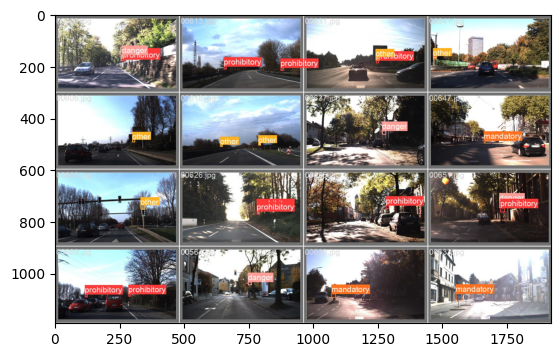

In [ ]:
print("Val batch0 labels:")
plt.imshow(plt.imread("/content/dataset/runs/detect/train/val_batch0_labels.jpg"))
plt.show()

Val batch0 pred:


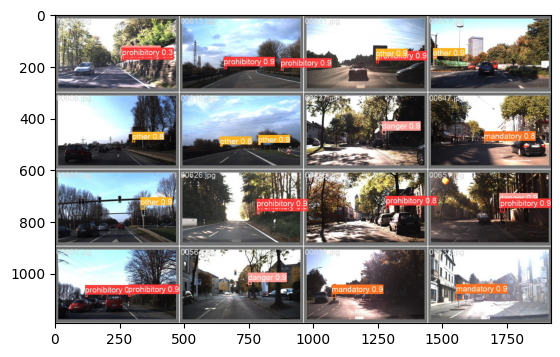

In [ ]:
print("Val batch0 pred:")
plt.imshow(plt.imread("/content/dataset/runs/detect/train/val_batch0_pred.jpg"))
plt.show()

### Nhận xét:
- Kết quả mẫu train rất tốt

## 3.Visualize dự đoán kèm bounding box của mô hình thu được từ bước (3) trên 8 mẫu trong tập test.

In [ ]:
def get_random_test_samples(test_folder, num_samples):
    test_images = [f for f in os.listdir(test_folder) if f.endswith(".jpg")]
    random_samples = random.sample(test_images, num_samples)
    return [os.path.join(test_folder, img) for img in random_samples]

In [ ]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
test_samples = get_random_test_samples(valid_folder, 8)

In [ ]:
test_samples

['/content/dataset/images/valid/00050.jpg',
 '/content/dataset/images/valid/00100.jpg',
 '/content/dataset/images/valid/00257.jpg',
 '/content/dataset/images/valid/00127.jpg',
 '/content/dataset/images/valid/00107.jpg',
 '/content/dataset/images/valid/00280.jpg',
 '/content/dataset/images/valid/00110.jpg',
 '/content/dataset/images/valid/00824.jpg']

In [ ]:
## inference with torch
# model = YOLO("/content/dataset/runs/detect/train/weights/best.pt")

## inference with onnx
# model = YOLO("/content/dataset/runs/detect/train/weights/best.onnx")
results = model.predict(test_samples, save=True, conf=0.5)


0: 384x640 1 mandatory, 1 other, 1: 384x640 2 dangers, 2: 384x640 2 dangers, 3: 384x640 2 prohibitorys, 4: 384x640 1 prohibitory, 1 danger, 5: 384x640 1 prohibitory, 1 other, 6: 384x640 1 prohibitory, 7: 384x640 1 prohibitory, 164.1ms
Speed: 1.9ms preprocess, 20.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train2


In [ ]:
predictions_folder = "/content/dataset/runs/detect/train2"
pred_image_files = [f for f in os.listdir(predictions_folder) if f.endswith(".jpg")]

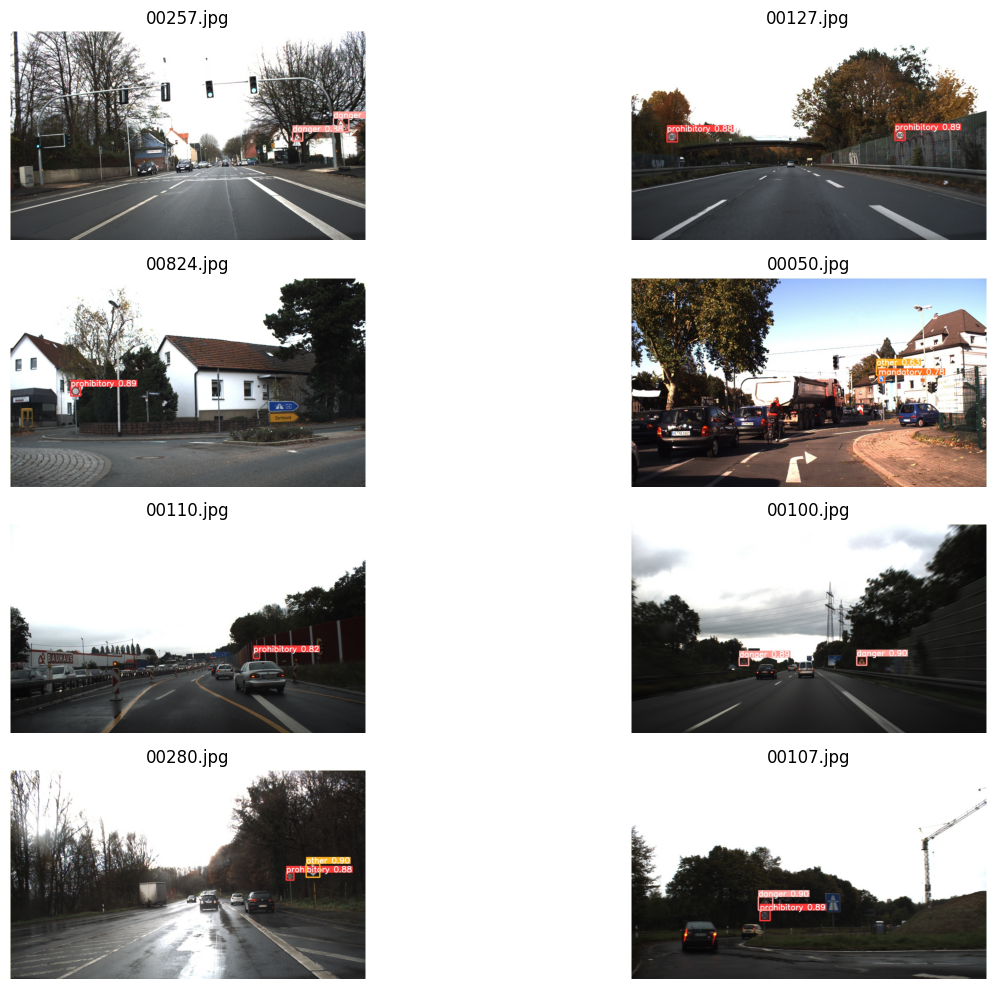

In [ ]:
# Hiển thị các hình ảnh
plt.figure(figsize=(15, 10))
for i, file_name in enumerate(pred_image_files, 1):
    img_path = os.path.join(predictions_folder, file_name)
    img = mpimg.imread(img_path)

    plt.subplot(4, 2, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(file_name)

plt.tight_layout()
plt.show()

### Nhận xét:
- Mô hình nhận diện tốt 4 phân loại biển báo giao thông.
- Hộp vẽ phù hợp, dính sát biển báo
- Nhận diện được biển báo chồng lên (hình 00050.jpg, 00107.jpg)

=> Mắt thường thấy mô hình hoạt động rất tốt trên vài mẫu random

## 4. Dự đoán trên tập test, in performance của model (mAP @ 50) trên các nhãn. Nhận xét

In [ ]:
metrics = model.val()  # evaluate model performance on the validation set
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.1.3 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/dataset/labels/valid.cache... 149 images, 0 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/dataset/images/valid/00340.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:05<00:00,  1.71it/s]


                   all        149        244      0.984      0.958       0.98      0.833
           prohibitory        149        108          1      0.999      0.995      0.879
                danger        149         47      0.969          1      0.989      0.839
             mandatory        149         29      0.986      0.931      0.951      0.789
                 other        149         60      0.982      0.902      0.987      0.824
Speed: 0.3ms preprocess, 16.9ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/detect/train3


array([    0.87862,     0.83934,     0.78854,     0.82432])

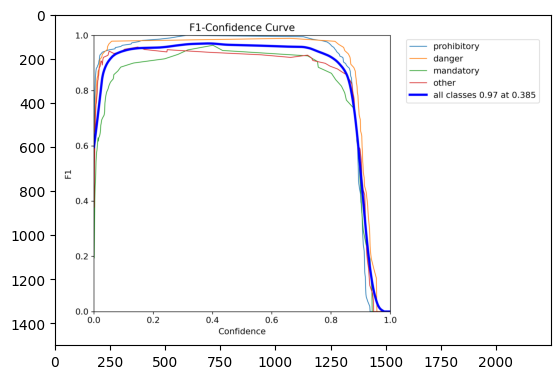

In [ ]:
plt.imshow(plt.imread("/content/dataset/runs/detect/train3/F1_curve.png"))
plt.show()

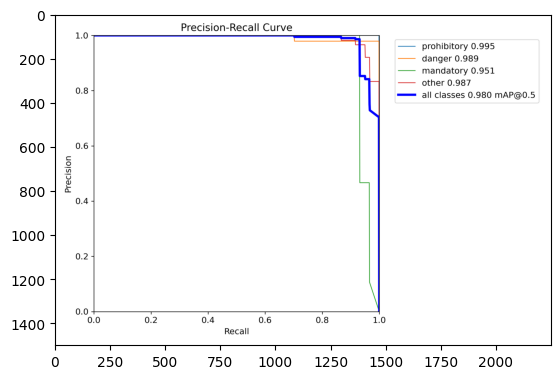

In [ ]:
plt.imshow(plt.imread("/content/dataset/runs/detect/train3/PR_curve.png"))
plt.show()

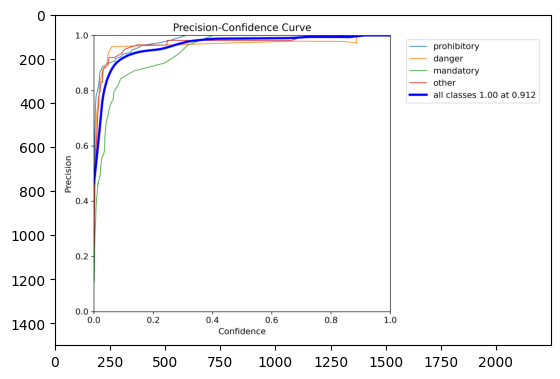

In [ ]:
plt.imshow(plt.imread("/content/dataset/runs/detect/train3/P_curve.png"))
plt.show()

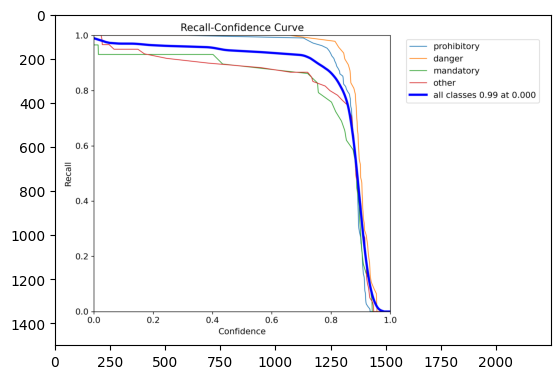

In [ ]:
plt.imshow(plt.imread("/content/dataset/runs/detect/train3/R_curve.png"))
plt.show()

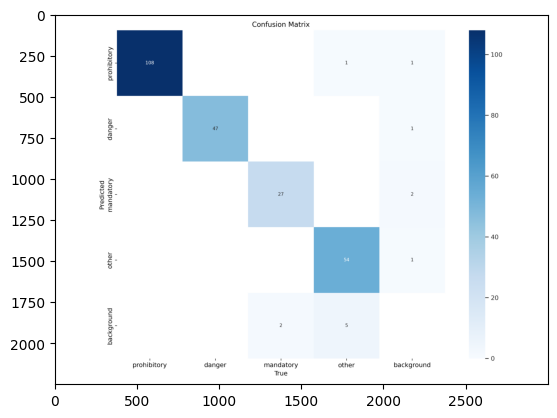

In [ ]:
plt.imshow(plt.imread("/content/dataset/runs/detect/train3/confusion_matrix.png"))
plt.show()

### Nhận xét:
- Mô hình có precision, recall, mAP tốt, mAP50 các lớp là 0.98.
- Biển Cấm (Prohibitory) có mAP50 cao nhất 99.5%
- Các Biển còn lại điểm cũng rất cao.
- Biển Bắt Buộc (Mandatory) thấp hơn so với còn lại, nhưng cũng rất cao >95%

=> Mô hình thông mình và có hiệu quả cao trong việc nhận diện và phân loại biển báo giao thông

In [ ]:
Test = model('/content/dataset/traffic-sign-to-test.mp4', save=True, conf=0.5)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/56) /content/dataset/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 229.4ms
video 1/1 (2/56) /content/dataset/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 25.3ms
video 1/1 (3/56) /content/dataset/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 25.2ms
video 1/1 (4/56) /content/dataset/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 25.3ms
video 1/1 (5/56) /content/dataset/traffic-sign-to-test.mp4: 384x640 2 prohibitorys, 25.2ms


In [ ]:
from IPython.display import Video

video_path = "/content/dataset/runs/detect/train4/traffic-sign-to-test.avi"
Video(video_path)

In [ ]:
!cp -r /content/dataset /gdrive/MyDrive/ComputerVision/Yolo

In [ ]:
!cp /content/data_traffic_sign_config.yaml /gdrive/MyDrive/ComputerVision/Yolo